# Setup

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [129]:
df = pd.read_csv('datasets/original/train.csv')

In [130]:
test_set = pd.read_csv('datasets/original/test.csv')

In [131]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [132]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [133]:
print(len(df))
print(len(df[df['satisfaction'] == 'satisfied']))
print(len(df[df['satisfaction'] == 'neutral or dissatisfied']))

103904
45025
58879


# Remoção de colunas "inúteis"

In [134]:
useless_columns = ['Unnamed: 0', 'id']

In [135]:
df = df.drop(axis=1, columns=useless_columns)

In [219]:
test_set = test_set.drop(axis=1, columns=useless_columns)

In [136]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


# Divisão por classes

In [230]:
df['satisfaction'] = df['satisfaction'].replace('satisfied', 1)
df['satisfaction'] = df['satisfaction'].replace('neutral or dissatisfied', 0)

test_set['satisfaction'] = test_set['satisfaction'].replace('satisfied', 1)
test_set['satisfaction'] = test_set['satisfaction'].replace('neutral or dissatisfied', 0)

/tmp/ipykernel_18214/2116301057.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_set['satisfaction'] = test_set['satisfaction'].replace('neutral or dissatisfied', 0)


In [138]:
train_set, validation_set = train_test_split(df, test_size=0.25, stratify=df['satisfaction'], random_state=42)

In [139]:
train_set

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
88952,Female,Loyal Customer,14,Business travel,Business,579,4,4,1,4,...,5,3,5,5,4,5,5,0,0.0,1
97144,Male,Loyal Customer,39,Business travel,Business,1671,5,5,5,5,...,5,5,5,5,3,5,4,0,0.0,1
29458,Male,disloyal Customer,25,Business travel,Business,414,2,5,2,3,...,1,4,4,5,3,5,1,5,4.0,0
69473,Male,Loyal Customer,60,Personal Travel,Business,210,2,2,2,3,...,1,1,2,1,1,1,1,0,0.0,0
80738,Female,disloyal Customer,24,Business travel,Eco Plus,247,5,0,5,3,...,2,4,5,1,5,3,2,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63485,Male,disloyal Customer,36,Business travel,Business,368,2,2,2,4,...,3,3,5,5,5,5,3,26,25.0,0
25837,Female,Loyal Customer,23,Business travel,Business,728,2,2,2,2,...,3,3,2,5,3,5,3,0,0.0,1
5490,Male,Loyal Customer,56,Business travel,Business,3342,4,4,4,4,...,5,5,5,5,4,5,4,1,1.0,1
32633,Male,disloyal Customer,33,Business travel,Eco,1585,2,2,2,3,...,1,4,4,3,3,3,1,26,30.0,0


In [140]:
train_set.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77687.000000,77928.000000
mean,39.376450,1185.576584,2.730033,3.059196,2.757571,2.978929,3.202187,3.248832,3.435659,3.358831,3.382571,3.350336,3.633700,3.305500,3.641862,3.287753,14.875667,15.268436,0.433336
std,15.125948,995.270532,1.327969,1.527266,1.399593,1.277842,1.329012,1.349096,1.319491,1.332708,1.289826,1.316917,1.178756,1.262437,1.173655,1.312656,38.480076,38.946861,0.495539
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,413.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,837.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1737.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [141]:
validation_set

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
39402,Male,disloyal Customer,34,Business travel,Business,522,2,2,2,2,...,1,4,3,3,3,3,3,141,125.0,0
30932,Female,Loyal Customer,46,Business travel,Eco,563,5,4,4,4,...,5,5,5,5,4,5,3,0,0.0,1
47867,Female,Loyal Customer,32,Business travel,Business,501,1,1,1,1,...,5,3,2,5,5,2,5,55,41.0,1
63212,Female,Loyal Customer,43,Business travel,Eco,201,5,3,3,3,...,5,5,5,5,5,5,5,0,0.0,1
84692,Female,Loyal Customer,10,Personal Travel,Eco,261,2,4,2,1,...,2,1,4,3,5,1,2,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59605,Male,Loyal Customer,17,Personal Travel,Eco,868,3,4,3,3,...,1,2,4,3,2,3,1,0,2.0,0
4608,Female,Loyal Customer,55,Business travel,Business,370,1,1,1,1,...,4,4,4,4,3,4,4,0,0.0,1
57765,Female,Loyal Customer,60,Business travel,Business,674,3,3,3,3,...,5,5,4,5,5,5,3,37,25.0,1
27811,Male,disloyal Customer,25,Business travel,Business,447,1,4,1,3,...,2,5,3,5,3,4,2,11,2.0,0


# Remoção de outliers

In [12]:
import matplotlib.pyplot as plt

In [13]:
numerical_columns = df.select_dtypes(include='number').columns
numerical_columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

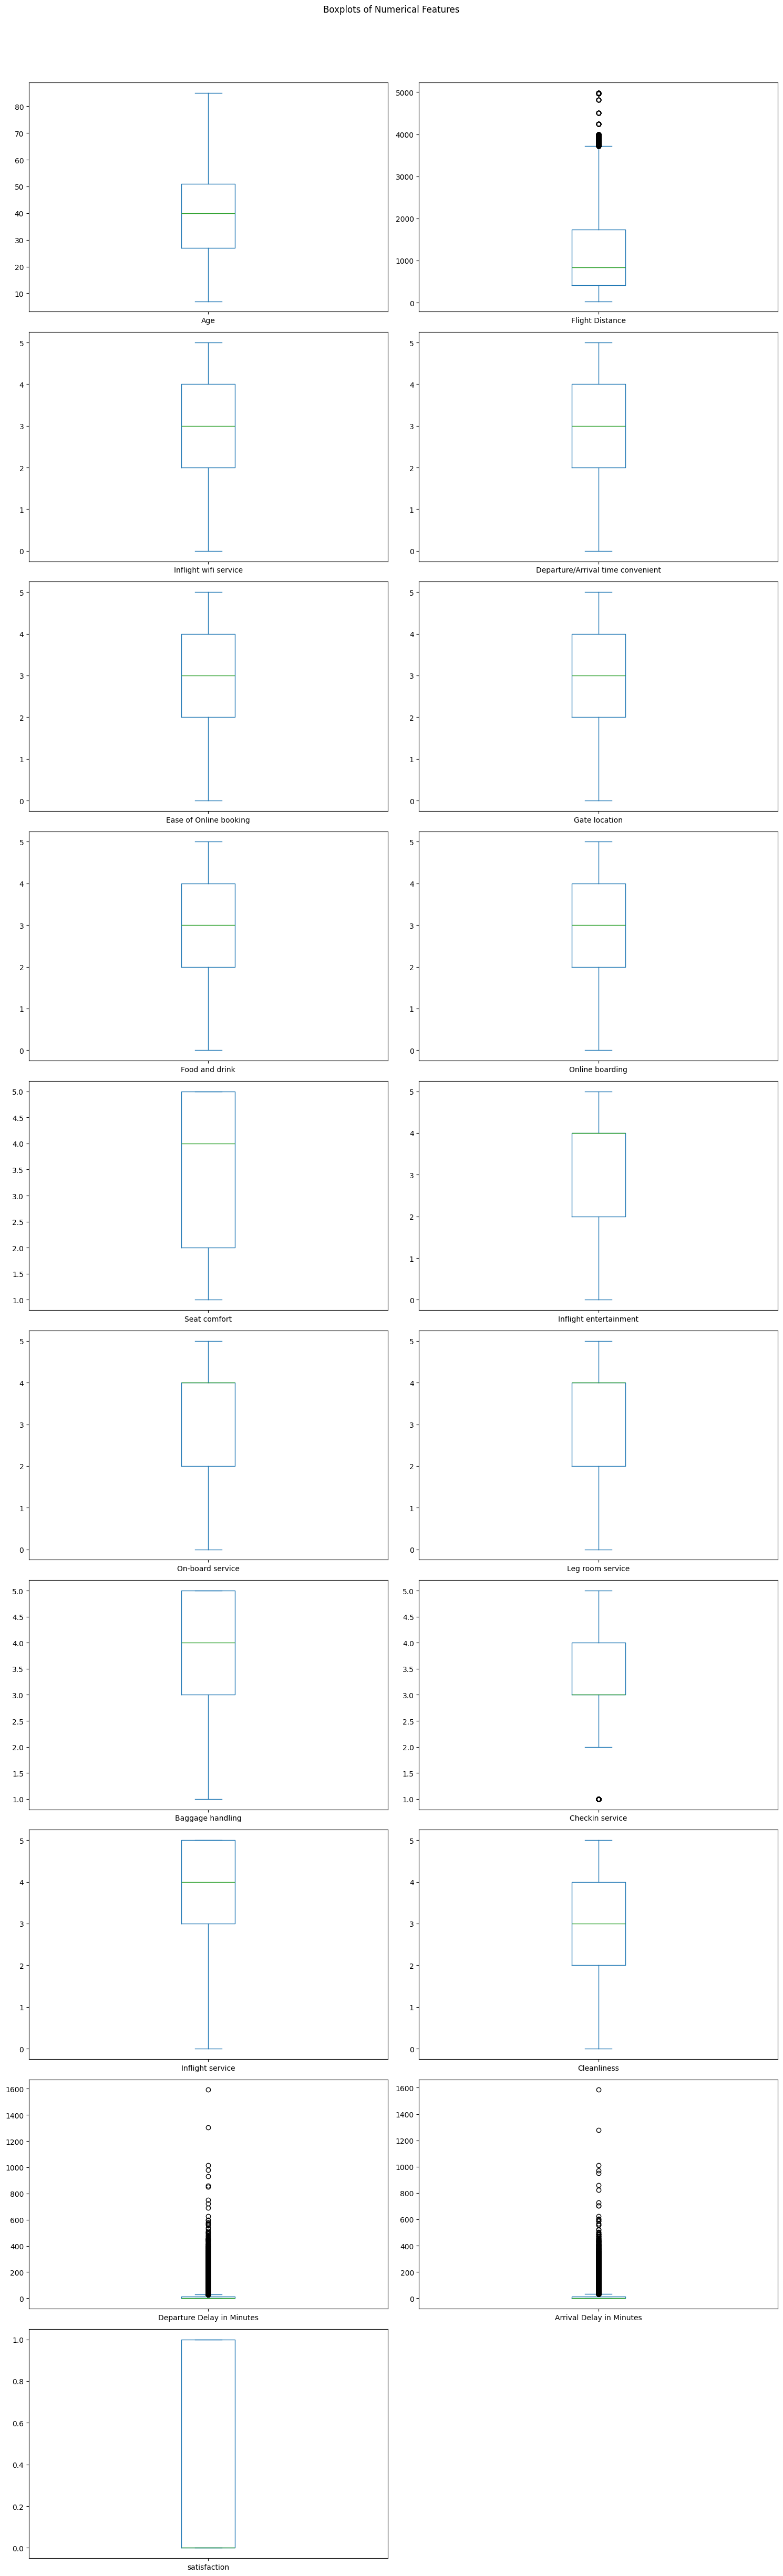

In [79]:
n_cols = len(numerical_columns)
n_rows = (n_cols + 1) // 2  # Adding 1 to ensure ceiling division

# Plot boxplots for each numerical column
train_set[numerical_columns].plot(kind='box', subplots=True, layout=(n_rows, 2), figsize=(15, n_rows * 5), title="Boxplots of Numerical Features")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Axes: ylabel='Frequency'>

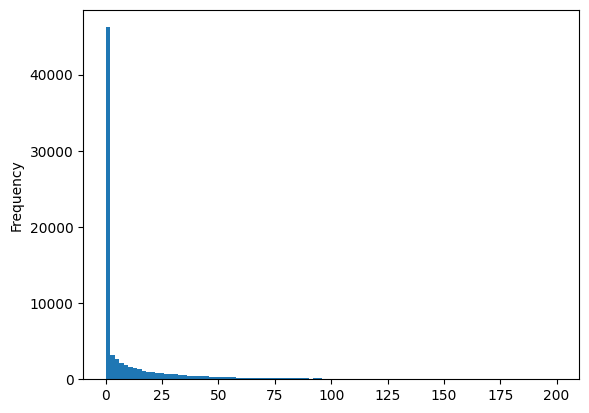

In [21]:
train_set['Departure Delay in Minutes'].plot.hist(bins=100, range=(0,200))

<Axes: ylabel='Frequency'>

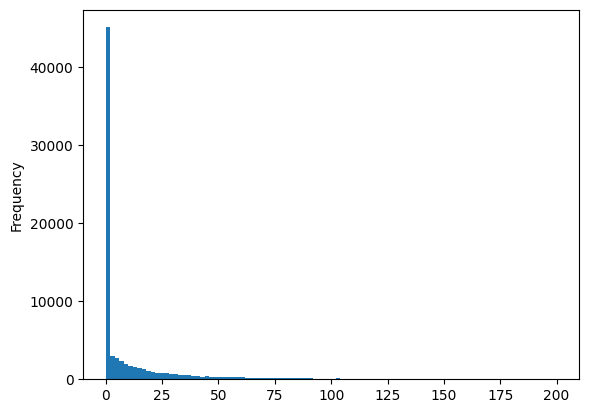

In [25]:
train_set['Arrival Delay in Minutes'].plot.hist(bins=100, range=(0,200))

<Axes: ylabel='Frequency'>

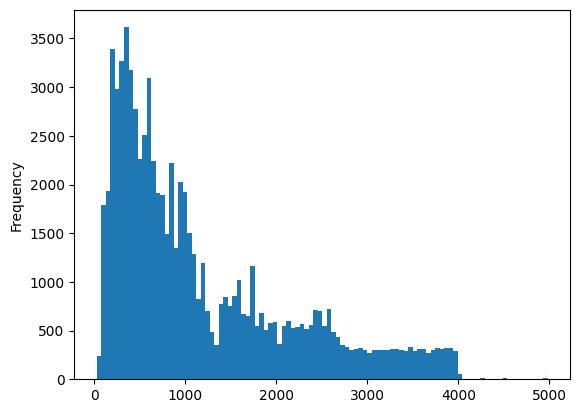

In [91]:
train_set['Flight Distance'].plot.hist(bins=100)

Os delays de saída e chegada não serão tratados como outliers, iremos transformá-los em variáveis categóricas (x = 0, 1 <= x <= 25, x > 25).

Da mesma forma, a distância do vôo será categorizada em 0-1000, 1000-2000, 2000-3000 e 3000+.

In [109]:
import numpy as np

In [142]:
def categorize_delay(df, column):
    conditions = [
        (df[column] == 0),
        (df[column] > 0) & (df[column] <= 25),
        (df[column] > 25)
    ]
    #choices = ['No Delay', 'Minor Delay', 'Huge Delay']
    choices = [0,1,2]
    df[column + ' Category'] = np.select(conditions, choices, default=3)
    return df

for column in ['Arrival Delay in Minutes', 'Departure Delay in Minutes']:
    for dataset in [train_set, validation_set, test_set]:
        dataset = categorize_delay(dataset, column)

In [143]:
for column in ['Arrival Delay in Minutes', 'Departure Delay in Minutes']:
    for dataset in [train_set, validation_set, test_set]:
        dataset.drop([column], axis=1, inplace=True)
        dataset.rename(columns={f'{column} Category': f'{column}'}, inplace=True)

In [145]:
def categorize_distance(df, column):
    conditions = [
        (df[column] >= 0) & (df[column] < 1000),
        (df[column] >= 1000) & (df[column] < 2000),
        (df[column] >= 2000) & (df[column] < 3000),
        (df[column] >= 3000)
    ]
    #choices = ['Short', 'Medium', 'Long', 'Very Long']
    choices = [0,1,2,3]
    df[column + ' Category'] = np.select(conditions, choices, default=4)
    return df

for dataset in [train_set, validation_set, test_set]:
    dataset = categorize_delay(dataset, 'Flight Distance')

In [146]:
column = 'Flight Distance'

for dataset in [train_set, validation_set, test_set]:
        dataset.drop([column], axis=1, inplace=True)
        dataset.rename(columns={f'{column} Category': f'{column}'}, inplace=True)

In [147]:
def remove_outliers_iqr(column):
    Q1 = train_set[column].quantile(0.25)
    Q3 = train_set[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    train_set_filtered = train_set[(train_set[column] >= lower_bound) & (train_set[column] <= upper_bound)]
    return train_set_filtered

In [148]:
for c in numerical_columns:
    if c in ['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance']:
        continue
    train_set = remove_outliers_iqr(c)

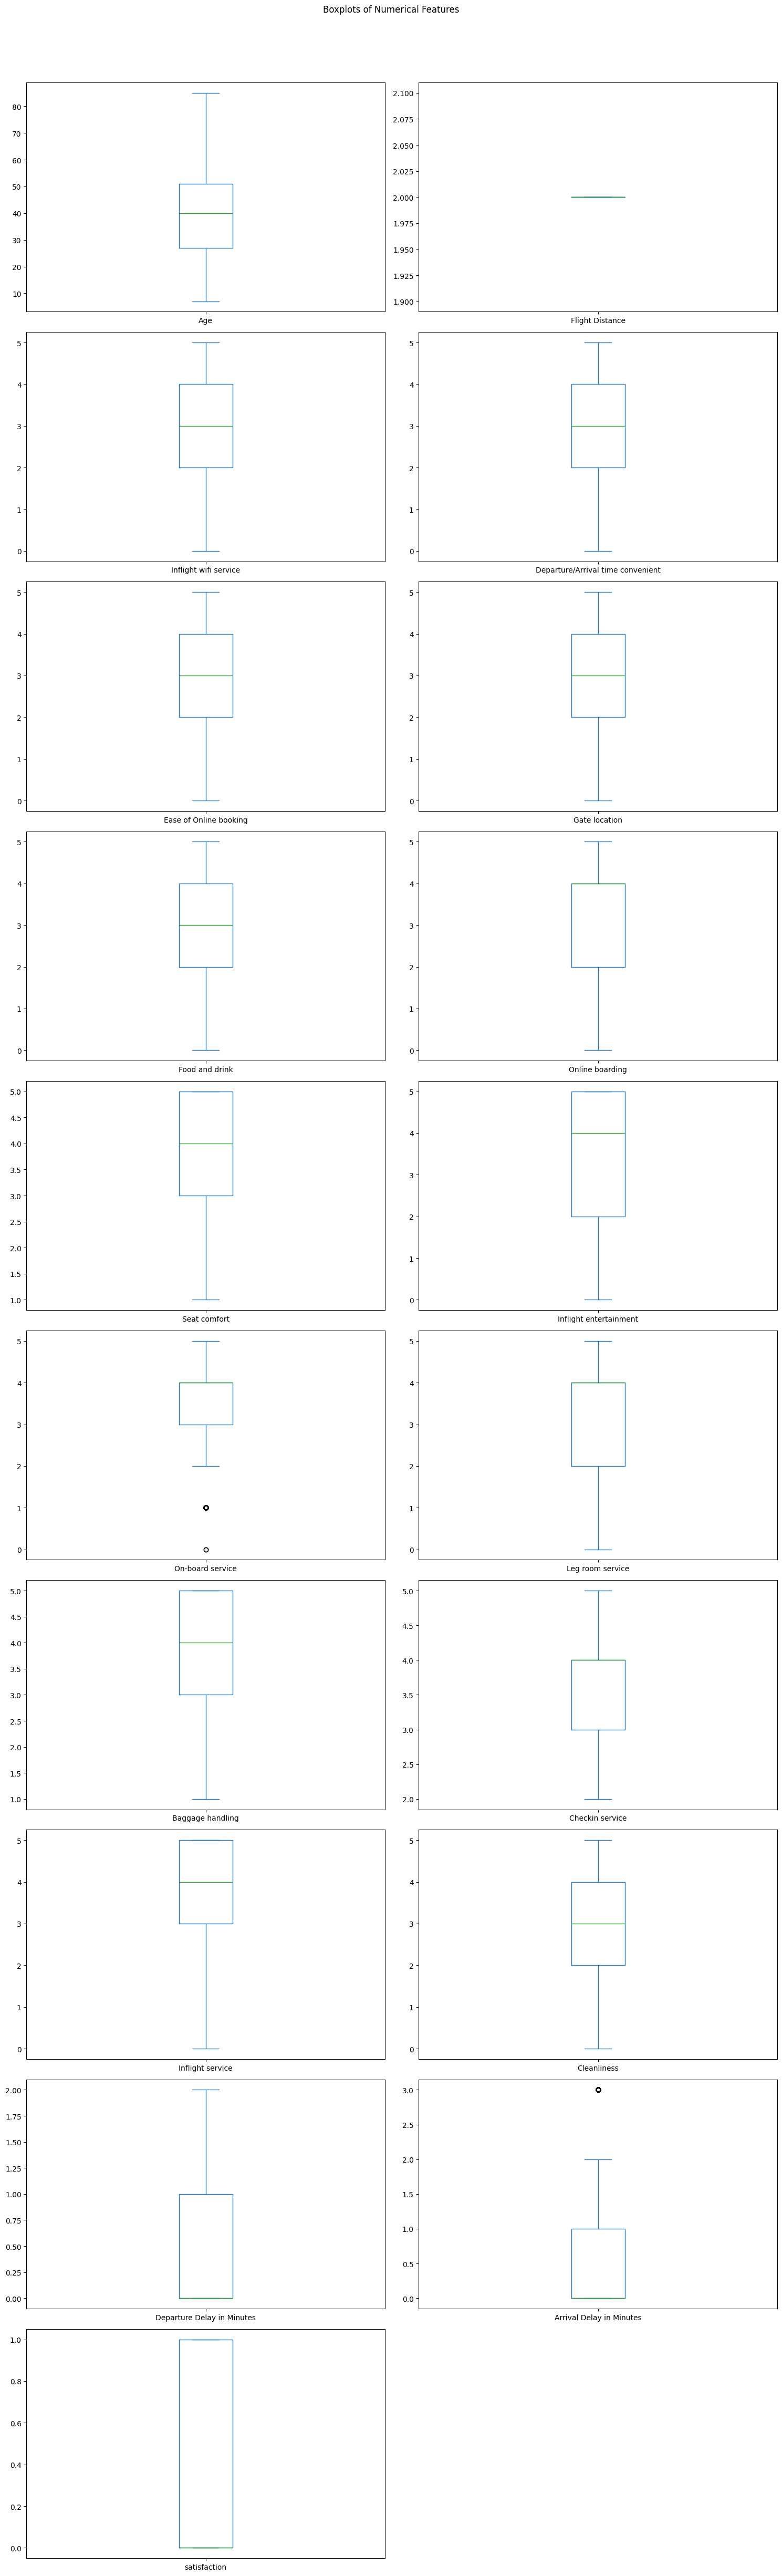

In [149]:
n_cols = len(numerical_columns)
n_rows = (n_cols + 1) // 2  # Adding 1 to ensure ceiling division

# Plot boxplots for each numerical column
train_set[numerical_columns].plot(kind='box', subplots=True, layout=(n_rows, 2), figsize=(15, n_rows * 5), title="Boxplots of Numerical Features")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Dados faltantes

Não existem dados faltantes (já lidamos com o delay de chegada).

In [151]:
train_set.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
satisfaction                         0
Arrival Delay in Minutes             0
Departure Delay in Minutes           0
Flight Distance                      0
dtype: int64

Para os dados faltantes nos conjuntos de teste e validação, iremos substituir com a mediana **do dataset de treino**.

In [152]:
validation_set.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
satisfaction                         0
Arrival Delay in Minutes             0
Departure Delay in Minutes           0
Flight Distance                      0
dtype: int64

In [153]:
test_set.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
satisfaction                         0
Arrival Delay in Minutes             0
Departure Delay in Minutes           0
Flight Distance                      0
dtype: int64

# Variáveis categóricas

In [159]:
from sklearn.preprocessing import OneHotEncoder

In [154]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [155]:
train_set[categorical_columns]

,Gender,Customer Type,Type of Travel,Class
88952,Female,Loyal Customer,Business travel,Business
97144,Male,Loyal Customer,Business travel,Business
29458,Male,disloyal Customer,Business travel,Business
80738,Female,disloyal Customer,Business travel,Eco Plus
47929,Male,Loyal Customer,Business travel,Business
...,...,...,...,...
63485,Male,disloyal Customer,Business travel,Business
25837,Female,Loyal Customer,Business travel,Business
5490,Male,Loyal Customer,Business travel,Business
32633,Male,disloyal Customer,Business travel,Eco


## Customer Type

In [172]:
column = 'Customer Type'

In [156]:
train_set[column].value_counts()

Customer Type
Loyal Customer       55992
disloyal Customer    12338
Name: count, dtype: int64

In [157]:
validation_set[column].value_counts()

Customer Type
Loyal Customer       21314
disloyal Customer     4662
Name: count, dtype: int64

In [158]:
test_set[column].value_counts()

Customer Type
Loyal Customer       21177
disloyal Customer     4799
Name: count, dtype: int64

In [205]:
train_encoded = pd.get_dummies(train_set, columns=[column])

In [206]:
train_encoded

,Gender,Age,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Arrival Delay in Minutes,Departure Delay in Minutes,Flight Distance,Customer Type_Loyal Customer,Customer Type_disloyal Customer
88952,Female,14,Business travel,2,4,4,1,4,5,4,...,5,4,5,5,1,0,0,2,True,False
97144,Male,39,Business travel,2,5,5,5,5,4,4,...,5,3,5,4,1,0,0,2,True,False
29458,Male,25,Business travel,2,2,5,2,3,1,2,...,5,3,5,1,0,1,1,2,False,True
80738,Female,24,Business travel,1,5,0,5,3,2,5,...,1,5,3,2,1,0,0,2,False,True
47929,Male,47,Business travel,2,1,1,1,1,2,5,...,4,3,4,5,1,1,1,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63485,Male,36,Business travel,2,2,2,2,4,3,2,...,5,5,5,3,0,1,2,2,False,True
25837,Female,23,Business travel,2,2,2,2,2,3,3,...,5,3,5,3,1,0,0,2,True,False
5490,Male,56,Business travel,2,4,4,4,4,4,4,...,5,4,5,4,1,1,1,2,True,False
32633,Male,33,Business travel,0,2,2,2,3,1,2,...,3,3,3,1,0,2,2,2,False,True


In [198]:
df_merged = pd.concat([train_set.drop(column, axis=1).reset_index(drop=True), train_encoded.astype(int).reset_index(drop=True)], ignore_index=True, sort=False)

In [199]:
df_merged

,Gender,Age,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Arrival Delay in Minutes,Departure Delay in Minutes,Flight Distance,Loyal Customer,disloyal Customer
0,Female,14.0,Business travel,2.0,4.0,4.0,1.0,4.0,5.0,4.0,...,5.0,4.0,5.0,5.0,1.0,0.0,0.0,2.0,NaN,NaN
1,Male,39.0,Business travel,2.0,5.0,5.0,5.0,5.0,4.0,4.0,...,5.0,3.0,5.0,4.0,1.0,0.0,0.0,2.0,NaN,NaN
2,Male,25.0,Business travel,2.0,2.0,5.0,2.0,3.0,1.0,2.0,...,5.0,3.0,5.0,1.0,0.0,1.0,1.0,2.0,NaN,NaN
3,Female,24.0,Business travel,1.0,5.0,0.0,5.0,3.0,2.0,5.0,...,1.0,5.0,3.0,2.0,1.0,0.0,0.0,2.0,NaN,NaN
4,Male,47.0,Business travel,2.0,1.0,1.0,1.0,1.0,2.0,5.0,...,4.0,3.0,4.0,5.0,1.0,1.0,1.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
136656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
136657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
136658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


## Gender

In [74]:
train_set['Gender'].value_counts()

Gender
Female    25074
Male      24455
Name: count, dtype: int64

In [88]:
validation_set['Gender'].value_counts()

Gender
Female    13191
Male      12785
Name: count, dtype: int64

In [167]:
test_set['Gender'].value_counts()

Gender
Female    13172
Male      12804
Name: count, dtype: int64

## Type of Travel

In [75]:
train_set['Type of Travel'].value_counts()

Type of Travel
Business travel    33694
Personal Travel    15835
Name: count, dtype: int64

In [92]:
validation_set['Type of Travel'].value_counts()

Type of Travel
Business travel    17852
Personal Travel     8124
Name: count, dtype: int64

In [166]:
test_set['Type of Travel'].value_counts()

Type of Travel
Business travel    18038
Personal Travel     7938
Name: count, dtype: int64

## Class

In [77]:
train_set['Class'].value_counts()

Class
Business    12388
Eco         11757
Eco Plus     1831
Name: count, dtype: int64

In [168]:
validation_set['Class'].value_counts()

Class
Business    12388
Eco         11757
Eco Plus     1831
Name: count, dtype: int64

In [169]:
test_set['Class'].value_counts()

Class
Business    12495
Eco         11564
Eco Plus     1917
Name: count, dtype: int64

In [170]:
class_replace = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}

In [171]:
for dataset in [train_set, validation_set, test_set]:
    dataset['Class'] = dataset['Class'].replace(class_replace)

/tmp/ipykernel_18214/303843141.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Class'] = dataset['Class'].replace(class_replace)


## Encoding

In [214]:
train_set = pd.get_dummies(train_set, columns=['Gender', 'Type of Travel', 'Customer Type'])
validation_set = pd.get_dummies(validation_set, columns=['Gender', 'Type of Travel', 'Customer Type'])
test_set = pd.get_dummies(test_set, columns=['Gender', 'Type of Travel', 'Customer Type'])

/tmp/ipykernel_18214/3546270179.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_set.replace({True: 1, False: 0})
/tmp/ipykernel_18214/3546270179.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_set.replace({True: 1, False: 0})
/tmp/ipykernel_18214/3546270179.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no

,Unnamed: 0,id,Age,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,satisfaction,Arrival Delay in Minutes,Departure Delay in Minutes,Flight Distance,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,0,19556,52,0,5,4,3,4,3,4,...,satisfied,2,2,2,1,0,1,0,1,0
1,1,90035,36,2,1,1,3,1,5,4,...,satisfied,0,0,2,1,0,1,0,1,0
2,2,12360,20,0,2,0,2,4,2,2,...,neutral or dissatisfied,0,0,2,0,1,1,0,0,1
3,3,77959,44,2,0,0,0,2,3,4,...,satisfied,1,0,2,0,1,1,0,1,0
4,4,36875,49,0,2,3,4,3,4,1,...,satisfied,1,0,2,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,34,2,3,3,3,1,4,3,...,neutral or dissatisfied,0,0,2,0,1,1,0,0,1
25972,25972,71167,23,2,4,4,4,4,4,4,...,satisfied,0,0,2,0,1,1,0,1,0
25973,25973,37675,17,0,2,5,1,5,2,1,...,neutral or dissatisfied,0,0,2,1,0,0,1,1,0
25974,25974,90086,14,2,3,3,3,3,4,4,...,satisfied,0,0,2,0,1,1,0,1,0


In [216]:
train_set.replace({True: 1, False: 0}, inplace=True)
validation_set.replace({True: 1, False: 0}, inplace=True)
test_set.replace({True: 1, False: 0}, inplace=True)

/tmp/ipykernel_18214/1300617085.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_set.replace({True: 1, False: 0}, inplace=True)
/tmp/ipykernel_18214/1300617085.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_set.replace({True: 1, False: 0}, inplace=True)
/tmp/ipykernel_18214/1300617085.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, s

In [218]:
test_set

,Unnamed: 0,id,Age,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,satisfaction,Arrival Delay in Minutes,Departure Delay in Minutes,Flight Distance,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,0,19556,52,0,5,4,3,4,3,4,...,satisfied,2,2,2,1,0,1,0,1,0
1,1,90035,36,2,1,1,3,1,5,4,...,satisfied,0,0,2,1,0,1,0,1,0
2,2,12360,20,0,2,0,2,4,2,2,...,neutral or dissatisfied,0,0,2,0,1,1,0,0,1
3,3,77959,44,2,0,0,0,2,3,4,...,satisfied,1,0,2,0,1,1,0,1,0
4,4,36875,49,0,2,3,4,3,4,1,...,satisfied,1,0,2,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,34,2,3,3,3,1,4,3,...,neutral or dissatisfied,0,0,2,0,1,1,0,0,1
25972,25972,71167,23,2,4,4,4,4,4,4,...,satisfied,0,0,2,0,1,1,0,1,0
25973,25973,37675,17,0,2,5,1,5,2,1,...,neutral or dissatisfied,0,0,2,1,0,0,1,1,0
25974,25974,90086,14,2,3,3,3,3,4,4,...,satisfied,0,0,2,0,1,1,0,1,0


# Normalização

In [227]:
from sklearn.preprocessing import MinMaxScaler

In [228]:
for column in train_set.columns:
    if column == 'satisfaction':
        continue

    scaler = MinMaxScaler()

    train_set[column] = scaler.fit_transform(train_set[[column]])
    validation_set[column] = scaler.transform(validation_set[[column]])
    test_set[column] = scaler.transform(test_set[[column]])

In [231]:
test_set

,Age,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Arrival Delay in Minutes,Departure Delay in Minutes,Flight Distance,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,0.576923,0.0,1.0,0.8,0.6,0.8,0.6,0.8,0.50,1.0,...,1,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.371795,1.0,0.2,0.2,0.6,0.2,1.0,0.8,1.00,0.8,...,1,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.166667,0.0,0.4,0.0,0.4,0.8,0.4,0.4,0.25,0.4,...,0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.474359,1.0,0.0,0.0,0.0,0.4,0.6,0.8,0.75,0.2,...,1,0.333333,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.538462,0.0,0.4,0.6,0.8,0.6,0.8,0.2,0.25,0.4,...,1,0.333333,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0.346154,1.0,0.6,0.6,0.6,0.2,0.8,0.6,0.75,0.8,...,0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
25972,0.205128,1.0,0.8,0.8,0.8,0.8,0.8,0.8,0.75,0.8,...,1,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
25973,0.128205,0.0,0.4,1.0,0.2,1.0,0.4,0.2,0.25,0.4,...,0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
25974,0.089744,1.0,0.6,0.6,0.6,0.6,0.8,0.8,0.75,0.8,...,1,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


# Random Oversampling

In [234]:
from imblearn.over_sampling import RandomOverSampler

In [235]:
print(len(train_set[train_set['satisfaction'] == 0]), len(train_set[train_set['satisfaction'] == 1]))

36831 31499


In [236]:
X = train_set.drop('satisfaction', axis=1)
y = train_set['satisfaction']

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Perform random oversampling on X and y together
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with resampled X and y
train_set_resampled = pd.DataFrame(X_resampled, columns=X.columns)
train_set_resampled['satisfaction'] = y_resampled

In [237]:
print(len(train_set_resampled[train_set_resampled['satisfaction'] == 0]), len(train_set_resampled[train_set_resampled['satisfaction'] == 1]))

36831 36831


# Saving datasets

In [238]:
train_set_resampled.to_csv('datasets/processed/train.csv', index=False)
validation_set.to_csv('datasets/processed/validation.csv', index=False)
test_set.to_csv('datasets/processed/test.csv', index=False)